# Model Evaluation / Comparison

In [1]:
# my virtual environments are rarely properly connected to jupyter so this fixes that. 
# you prolly won't need this cell but running it won't hurt anything either
import sys
import os
current_dir = os.getcwd()  # Get the current working directory
venv_dir = os.path.join(current_dir, 'venv') 
python_version = str(sys.version_info.major) + '.' + str(sys.version_info.minor)
site_packages_path = os.path.join(venv_dir, 'lib', 'python' + python_version, 'site-packages')
sys.path.append(site_packages_path) 

In [2]:
import torch
from model_comparison import  plot_column_from_csv, evaluate_models, format_model_output

In [3]:
models_to_compare = [
    'templateGPT_1m_5ft11_and_skinnyfat',
    'templateGPT_1m_short_and_thicc',
    'templateGPT_1m_tall_and_skinny',
    'templateGPT_2m_CosineNorm',
    'templateGPT_2m_LayerNorm',
    'templateGPT_2m_RMSNorm',
    'templateGPT_3m_GatedMLP',
    'templateGPT_3m_NotGatedMLP',
    'templateGPT_4m_GeGLU',
    'templateGPT_4m_SwiGLU'
]

### first up we'll look at loss curves
notice that even with a log scale I had to splice out the first 5% to make the lines distinct

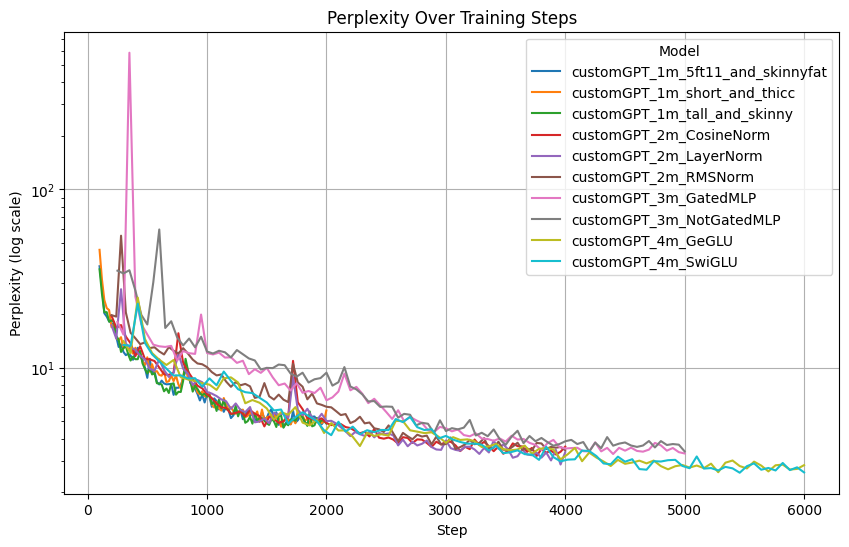

In [4]:
plot_column_from_csv(models_to_compare, 'Step', 'Perplexity', log_y=True, trim_percentage=5)

### now let's compare individual token accuracies
we'll compare topk teacher-forcing accuracies since these models really aren't good enough to be looking at actual inference output

In [5]:
topk = 5
results, correct_data = evaluate_models(models_to_compare, topk)

931.136K parameters
ModelConfig(dim=64, device='cpu', tokenizer='bpe', vocab_len=8192, num_layers=8, second_resid_norm=False, mlp_hidden_mult=4, mlp_bias=False, mlp_nonlinearity='SiLU', mlp_gated=True, num_q_heads=4, num_kv_heads=1, head_dim=28, theta=10000, max_seq_len=512, scale_first_resid=True, norm_type='RMSNorm', norm_affine=True, norm_bias=True, eps=1e-06, max_batch_size=1)
Model(
  (token_embedder): Embedding(8195, 64)
  (layers): ModuleList(
    (0-7): 8 x Layer(
      (pre_attn_norm): Norm()
      (attn): MQA(
        (Wq): Linear(in_features=64, out_features=112, bias=False)
        (Wk): Linear(in_features=64, out_features=28, bias=False)
        (Wv): Linear(in_features=64, out_features=28, bias=False)
        (Wo): Linear(in_features=112, out_features=64, bias=False)
      )
      (pre_mlp_norm): Norm()
      (mlp): MLP(
        (Wup): Linear(in_features=64, out_features=170, bias=False)
        (Wgate): Linear(in_features=64, out_features=170, bias=False)
        (Wdown)

In [6]:
# Display the results for each model
for name, data in results.items():
    format_model_output(name, data, topk, data['tokenizer'], correct_data)

Model: customGPT_1m_5ft11_and_skinnyfat
  - Top-5 Accuracy: 67.19%
True	Predicted
Ja	['Once', 'On', 'Lily', 'To', 'Ann']
ck	['ck', 'ne', '', 'ed', 'rs']
 	['', ', ', '', 'ing', 'ly']
and	['was', 'and', 'ar', 'like', 'live']
 	['', '', 'ma', ' "', 'di']
Ja	['Be', '', 'hi', 'To', 'Ma']
ni	['ne', 'ck', 'ke', '', 'ni']
e	['sh', '', 'ng', '', '']
 	['', '. ', ', ', "'s", 'ir']
were	['were', 'live', 'ar', 'was', 'had']
 	['', '.\n', '', '. ', ', ']
walk	['pla', 'fr', 've', 'th', 'tw']
ing	['ing', '', 'ed', '. ', '.\n']
 	['', ', ', '. ', '.\n', 'ing']
in	['in', 'to', 'up', 'and', 'th']
 	['', '. ', ', ', '.\n', 'cr']
th	['th', 'hi', '', 'her', 'an']
e	['', 'em', 'er', 'ey', 'is']
 	['', 'ir', '. ', "'s", '.\n']
pa	['pa', 'forest', 'gr', 'wat', 'sky']
r	['', '', 'rr', 'nt', '']
k	['', 'tle', 'ld', 'ty', 'ne']
 	['. ', '', ', ', '.\n', 'ful']
to	['and', 'wi', 'to', 'up', 'was']
get	['', 'get', 'as', 'da', 'de']

Model: customGPT_1m_short_and_thicc
  - Top-5 Accuracy: 65.62%
True	Predicted
Ja	[

# in the future it'd be cool to build out an automated GPT-4 rater like what they used in the TinyStories paper

# also once the hyperparameter search module is working i should build a system that performs a regression on the hyperparameters tested to predict teacher-forcing topk accuracy. likely need to include both linear, quadratic, & interaction terms in the regression and then do a lasso to remove useless terms